In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from scipy.stats import binned_statistic
df_1718 = pd.read_csv('data/2017-2018.csv',sep=',')

In [223]:
# df_1718 = df_1718.iloc[:1000,:]

In [224]:
df_1718.sort_values(['Aggregate Sentence Length'])

,Number,Race,Race Grouping,Gender,Age,Incarcerated/Supervised,Supervision Type,Sentence Type,Aggregate Sentence Length,Province,Marital Status,Religion
17216,17217,WHITE,Non Indigenous,MALE,36,Incarcerated,NaN,INDETERMINATE,0,BRITISH COLUMBIA,COMMON LAW,NONE
6338,6339,WHITE,Non Indigenous,MALE,53,Supervised,FP,INDETERMINATE,0,QUEBEC,COMMON LAW,CATH NON-SPEC
6337,6338,WHITE,Non Indigenous,MALE,35,Incarcerated,NaN,INDETERMINATE,0,ONTARIO,SINGLE,CATHOLIC - ROMA
16615,16616,WHITE,Non Indigenous,MALE,66,Supervised,FP,INDETERMINATE,0,QUEBEC,COMMON LAW,PROT NON-SPEC
6334,6335,BLACK,Non Indigenous,MALE,34,Incarcerated,NaN,INDETERMINATE,0,ONTARIO,COMMON LAW,RASTAFARIAN
...,...,...,...,...,...,...,...,...,...,...,...,...
5356,5357,WHITE,Non Indigenous,MALE,63,Incarcerated,NaN,DETERMINATE,23644,BRITISH COLUMBIA,SINGLE,JUDAISM
15142,15143,WHITE,Non Indigenous,MALE,71,Supervised,FP,DETERMINATE,26672,QUEBEC,DIVORCED,CATH NON-SPEC
9793,9794,WHITE,Non Indigenous,MALE,61,Incarcerated,NaN,DETERMINATE,26733,QUEBEC,SINGLE,CATH NON-SPEC
19166,19167,WHITE,Non Indigenous,MALE,71,Incarcerated,NaN,DETERMINATE,28398,QUEBEC,SINGLE,PROT NON-SPEC


In [225]:
def preprocess(df):
    target_cols = ['Race','Race Grouping','Gender','Age','Sentence Type','Aggregate Sentence Length','Marital Status','Religion']
    df = df[target_cols]
    df = df[df['Sentence Type']=='DETERMINATE']
    return df
df_1718 = preprocess(df_1718)



In [226]:
def make_pie(x,y):
    # theme = plt.get_cmap('coolwarm')
#     explode = (0.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
    fig, ax = plt.subplots(figsize=(7, 7))

    # ax.set_prop_cycle("color", [theme(1. * i / len(y))
    #                              for i in range(len(y))])

    wedges, texts, autotexts = ax.pie(y,
                                           labels=x,
#                                            explode=explode,
                                           autopct='%1.1f%%')
    percent = 100.*y/y.sum()
    labels = ['{0:5} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
    ax.legend(wedges,
                   labels,
                   title="Race Distribution Legend",
                   loc="center right",
                   bbox_to_anchor=(1.7, 0.5))
    ax.set_title('Race Distribution Pie Chart')

## Race Distribution

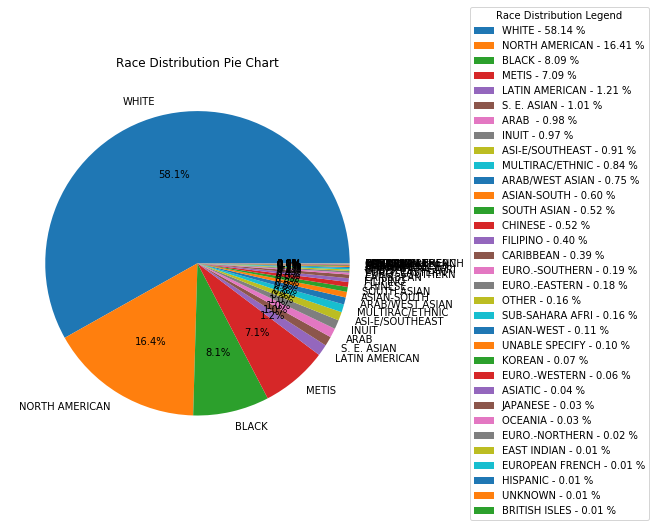

In [227]:
df_race = df_1718['Race'].value_counts()
x = df_race.index
y = df_race.values
make_pie(x,y)

## Race vs. Average Sentence Length

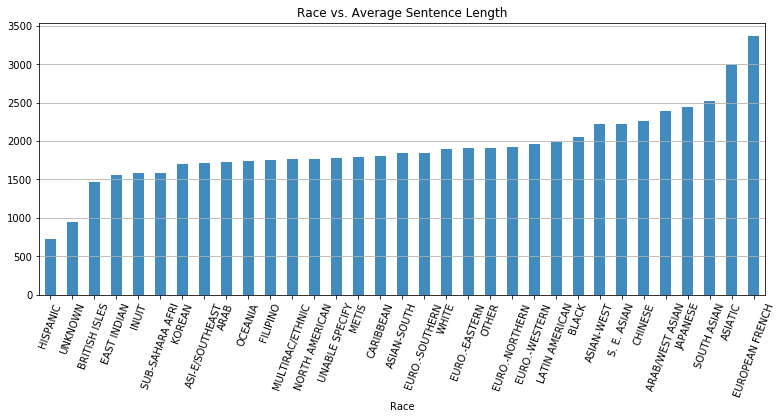

In [228]:
df_avg_sentence = df_1718.groupby(['Race'])['Aggregate Sentence Length'].mean().sort_values(ascending=True)
avg_sentence_bar = df_avg_sentence.plot(kind='bar',
                                        alpha=0.85,
                                        figsize=(13,5),
                                        rot=70,
                                        title = "Race vs. Average Sentence Length"
                                       ).grid(axis='y')

## Race vs. Max Sentence Length

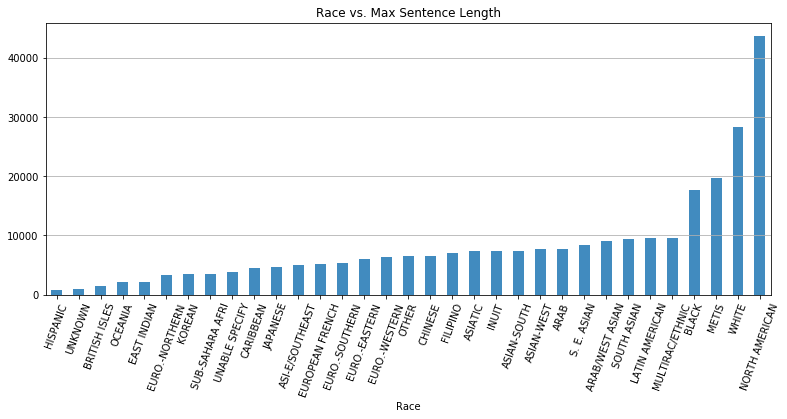

In [229]:
df_max_sentence = df_1718.groupby(['Race'])['Aggregate Sentence Length'].max().sort_values(ascending=True)
max_sentence_bar = df_max_sentence.plot(kind='bar',
                                        alpha=0.85,
                                        figsize=(13,5),
                                        rot=70,
                                        title = "Race vs. Max Sentence Length"
                                       ).grid(axis='y')